## Setup
Please download result data from this [link](https://www.dropbox.com/s/39gvm9lnn180nap/meta_marl_result.zip?dl=0). Then, unzip and put the data in `meta_marl/notebook/data`. 

In [1]:
import seaborn as sns
import pylab as plot
import matplotlib.pyplot as plt
import numpy as np

# Set plotting
sns.set_style("ticks")
sns.set_palette(sns.color_palette("hls", 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 14}
plot.rcParams.update(params)

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

MAX_ITERATION = 20
N_SEED = 20

In [2]:
def read_key_from_log(path, key, index, i_agent=None):
    with open(path) as f:
        content = f.read().splitlines()

    data = []
    for line in content:
        target_data = None
        if key in line:
            if i_agent is not None:
                words = line.split()
                if int(words[-6][0]) == i_agent:
                    target_data = line.split()[index]
            else:
                target_data = line.split()[index]
                
        if target_data is not None:
            if target_data[0] == "[":
                target_data = target_data[1:-1]
            if target_data[0] == ",":
                target_data = target_data[1:-1]
            if target_data[-1] == ",":
                target_data = target_data[0:-1]
            data.append(float(target_data))

    assert len(data) > 0

    return data

In [3]:
ours_cost, ours_obj = [], []
for seed in range(1, 10):
    path = "./data/pointmass/ours/example-" + str(seed)
    try:
        cost = read_key_from_log(path, key="constraint is", index=-1)
    except:
        continue
    
    if len(cost) >= 200:
        ours_cost.append(np.array(cost))
    else:
        continue

    obj = read_key_from_log(path, key="return is", index=-1)
    if len(obj) >= 200:    
        ours_obj.append(np.array(obj))
    else:
        continue
ours_cost = np.stack(ours_cost, axis=0)
ours_obj = np.stack(ours_obj, axis=0)
print(ours_cost.shape, ours_obj.shape)

(2, 3600) (2, 3600)


In [4]:
# ppo_task5_cost, ppo_task5_obj = [], []
# for seed in range(1, 10):
#     path = "./data/pointmass/task5/ppo_seed::" + str(seed) + "_log"
#     try:
#         cost = read_key_from_log(path, key="cost", index=-1)
#     except:
#         continue
#     if len(cost) >= 200000:
#         ppo_task5_cost.append(np.array(cost))
#     else:
#         continue

#     obj = read_key_from_log(path, key="return", index=-1)
#     if len(obj) >= 200000:    
#         ppo_task5_obj.append(np.array(obj))
#     else:
#         continue
# ppo_task5_cost = np.stack(ppo_task5_cost, axis=0) - 5
# ppo_task5_obj = np.stack(ppo_task5_obj, axis=0)
# print(ppo_task5_cost.shape, ppo_task5_obj.shape)

In [5]:
ppo_task6_cost, ppo_task6_obj = [], []
for seed in range(1, 10):
    path = "./data/pointmass/task6/ppo_seed::" + str(seed) + "_log"
    try:
        cost = read_key_from_log(path, key="cost", index=-1)
    except:
        continue
    if len(cost) >= 200000:
        ppo_task6_cost.append(np.array(cost))
    else:
        continue

    obj = read_key_from_log(path, key="return", index=-1)
    if len(obj) >= 200000:    
        ppo_task6_obj.append(np.array(obj))
    else:
        continue
ppo_task6_cost = np.stack(ppo_task6_cost, axis=0) - 5
ppo_task6_obj = np.stack(ppo_task6_obj, axis=0)
print(ppo_task6_cost.shape, ppo_task6_obj.shape)

(4, 200000) (4, 200000)


In [6]:
# cpo_task5_cost, cpo_task5_obj = [], []
# for seed in range(1, 10):
#     path = "./data/pointmass/seed::" + str(seed) + "_algo::cpo_task::5_cost_lim::5.0"
#     try:
#         cost = read_key_from_log(path, key="cost:", index=-1)
#     except:
#         continue
#     if len(cost) > 200000:
#         cpo_task5_cost.append(np.array(cost))
#     else:
#         continue

#     obj = read_key_from_log(path, key="return:", index=-1)
#     if len(obj) > 200000:    
#         cpo_task5_obj.append(np.array(obj))
#     else:
#         continue

# cpo_task5_cost = np.stack(cpo_task5_cost, axis=0)
# cpo_task5_obj = np.stack(cpo_task5_obj, axis=0)
# print(cpo_task5_cost.shape, cpo_task5_obj.shape)

In [7]:
cpo_task6_cost, cpo_task6_obj = [], []
for seed in range(1, 10):
    path = "./data/pointmass/seed::" + str(seed) + "_algo::cpo_task::6_cost_lim::5.0"
    try:
        cost = read_key_from_log(path, key="cost:", index=-1)
    except:
        continue
    if len(cost) > 200000:
        cpo_task6_cost.append(np.array(cost))
    else:
        continue

    obj = read_key_from_log(path, key="return:", index=-1)
    if len(obj) > 200000:    
        cpo_task6_obj.append(np.array(obj))
    else:
        continue

cpo_task6_cost = np.stack(cpo_task6_cost, axis=0)
cpo_task6_obj = np.stack(cpo_task6_obj, axis=0)
print(cpo_task6_cost.shape, cpo_task6_obj.shape)

(5, 200001) (5, 200001)


In [8]:
# ppo_lag_task5_cost, ppo_lag_task5_obj = [], []
# for seed in range(1, 10):
#     path = "./data/pointmass/seed::" + str(seed) + "_algo::ppo_lagrangian_task::5_cost_lim::5.0"
#     try:
#         cost = read_key_from_log(path, key="cost:", index=-1)
#     except:
#         continue
#     if len(cost) > 200000:
#         ppo_lag_task5_cost.append(np.array(cost))
#     else:
#         continue

#     obj = read_key_from_log(path, key="return:", index=-1)
#     if len(obj) > 200000:    
#         ppo_lag_task5_obj.append(np.array(obj))
#     else:
#         continue

# ppo_lag_task5_cost = np.stack(ppo_lag_task5_cost, axis=0)
# ppo_lag_task5_obj = np.stack(ppo_lag_task5_obj, axis=0)
# print(ppo_lag_task5_cost.shape, ppo_lag_task5_obj.shape)

In [9]:
ppo_lag_task6_cost, ppo_lag_task6_obj = [], []
for seed in range(1, 10):
    path = "./data/pointmass/seed::" + str(seed) + "_algo::ppo_lagrangian_task::6_cost_lim::5.0"
    try:
        cost = read_key_from_log(path, key="cost:", index=-1)
    except:
        continue
    if len(cost) > 200000:
        ppo_lag_task6_cost.append(np.array(cost))
    else:
        continue

    obj = read_key_from_log(path, key="return:", index=-1)
    if len(obj) > 200000:    
        ppo_lag_task6_obj.append(np.array(obj))
    else:
        continue

ppo_lag_task6_cost = np.stack(ppo_lag_task6_cost, axis=0)
ppo_lag_task6_obj = np.stack(ppo_lag_task6_obj, axis=0)
print(ppo_lag_task6_cost.shape, ppo_lag_task6_obj.shape)

(5, 200001) (5, 200001)


In [10]:
# fig, ax = plt.subplots()
# sns.set_style("ticks")        
# datas = [ppo_task5_cost, ppo_lag_task5_cost, cpo_task5_cost]
# legends = ["PPO", "PPO Lag", "CPO"]
# colors = [
#     sns.color_palette("hls", 8)[0], 
#     sns.color_palette("hls", 8)[3], 
#     sns.color_palette("hls", 8)[5],
#     sns.color_palette("hls", 8)[6]]

# for data, legend, color in zip(datas, legends, colors):
#     mean = np.mean(data, axis=0)
#     std = np.std(data, axis=0)
#     confidence = 1.96 * std / float(np.sqrt(10))  # 95% interval
#     error = (mean - confidence, mean + confidence)

#     ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
#     ax.plot(np.arange(mean.shape[0]), mean, label=legend, color=color)      

# plt.xlabel(r'\textbf{Train Iteration}', size=18)
# plt.ylabel(r'\textbf{Average Cost', size=18)
# plt.title(r'\textbf{Pointmass: Task5}', size=18)
# plt.legend()        

In [11]:
# fig, ax = plt.subplots()
# sns.set_style("ticks")        
# datas = [ppo_task5_obj, ppo_lag_task5_obj, cpo_task5_obj]
# colors = [
#     sns.color_palette("hls", 8)[0], 
#     sns.color_palette("hls", 8)[3], 
#     sns.color_palette("hls", 8)[5],
#     sns.color_palette("hls", 8)[6]]

# for data, legend, color in zip(datas, legends, colors):
#     mean = np.mean(data, axis=0)
#     std = np.std(data, axis=0)
#     confidence = 1.96 * std / float(np.sqrt(5))  # 95% interval
#     error = (mean - confidence, mean + confidence)

#     ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
#     ax.plot(np.arange(mean.shape[0]), mean, label=legend, color=color)      

# plt.xlabel(r'\textbf{Train Iteration}', size=18)
# plt.ylabel(r'\textbf{Average Return', size=18)
# plt.title(r'\textbf{Pointmass: Task5}', size=18)
# plt.legend()     

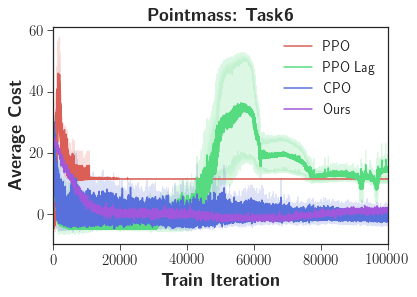

In [14]:
fig, ax = plt.subplots()
sns.set_style("ticks")        
datas = [ppo_task6_cost, ppo_lag_task6_cost, cpo_task6_cost, ours_cost]
legends = ["PPO", "PPO Lag", "CPO", "Ours"]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]

for data, legend, color in zip(datas, legends, colors):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 1.96 * std / float(np.sqrt(10))  # 95% interval
    error = (mean - confidence, mean + confidence)

    ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
    if legend == "Ours":
        x = np.arange(mean.shape[0]) * 32
    else:
        x = np.arange(mean.shape[0])
    ax.plot(x, mean, label=legend, color=color)      

plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Average Cost', size=18)
plt.title(r'\textbf{Pointmass: Task6}', size=18)
plt.xlim([0, 100000])
plt.legend()        

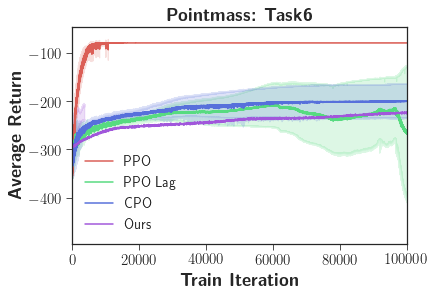

In [15]:
fig, ax = plt.subplots()
sns.set_style("ticks")        
datas = [ppo_task6_obj, ppo_lag_task6_obj, cpo_task6_obj, ours_obj]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]

for data, legend, color in zip(datas, legends, colors):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 1.96 * std / float(np.sqrt(5))  # 95% interval
    error = (mean - confidence, mean + confidence)

    ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
    if legend == "Ours":
        x = np.arange(mean.shape[0]) * 32
    else:
        x = np.arange(mean.shape[0])    
    ax.plot(x, mean, label=legend, color=color)      

plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Average Return', size=18)
plt.title(r'\textbf{Pointmass: Task6}', size=18)
plt.xlim([0, 100000])
plt.legend()     